In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("sensor_data.csv")
df.head()

sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1 -0.463418 -0.465730  0.241962 -1.913280 -1.724918 -0.562288 -1.012831   
2  1.465649 -0.225776  0.067528 -1.424748 -0.544383  0.110923 -1.150994   
3 -0.601707  1.852278 -0.013497 -1.057711  0.822545 -1.220844  0.208864   
4  0.738467  0.171368 -0.115648 -0.301104 -1.478522 -0.719844 -0.460639   

   sensor_8  sensor_9  sensor_10  anomaly  
0  0.767435 -0.469474   0.542560      0.0  
1  0.314247 -0.908024  -1.412304      0.0  
2  0.375698 -0.600639  -0.291694      0.0  
3 -1.959670 -1.328186   0.196861      0.0  
4  1.057122  0.343618  -1.763040      0.0

In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_1   1000 non-null   float64
 1   sensor_2   1000 non-null   float64
 2   sensor_3   1000 non-null   float64
 3   sensor_4   1000 non-null   float64
 4   sensor_5   1000 non-null   float64
 5   sensor_6   1000 non-null   float64
 6   sensor_7   1000 non-null   float64
 7   sensor_8   1000 non-null   float64
 8   sensor_9   1000 non-null   float64
 9   sensor_10  1000 non-null   float64
 10  anomaly    1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB
None
          sensor_1     sensor_2     sensor_3     sensor_4     sensor_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.010788     0.031292    -0.022542    -0.043075     0.013622   
std       1.005433     1.016046     0.983366     0.983406     1.012645   
min      -3.922400    -3.688365

In [5]:
df.fillna(df.median(), inplace=True)

Index(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'anomaly'],
      dtype='object')


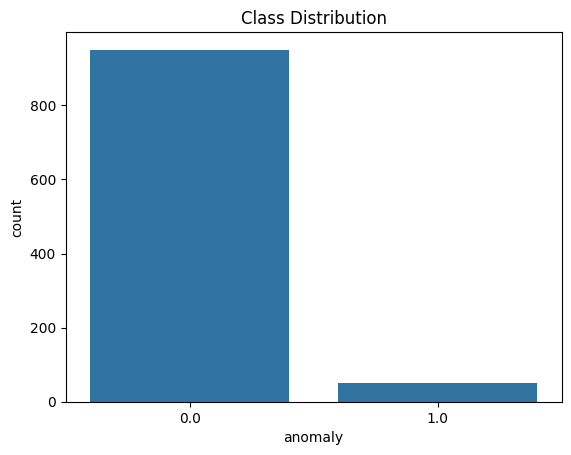

In [9]:
print(df.columns)
sns.countplot(x='anomaly', data=df)
plt.title('Class Distribution')
plt.show()


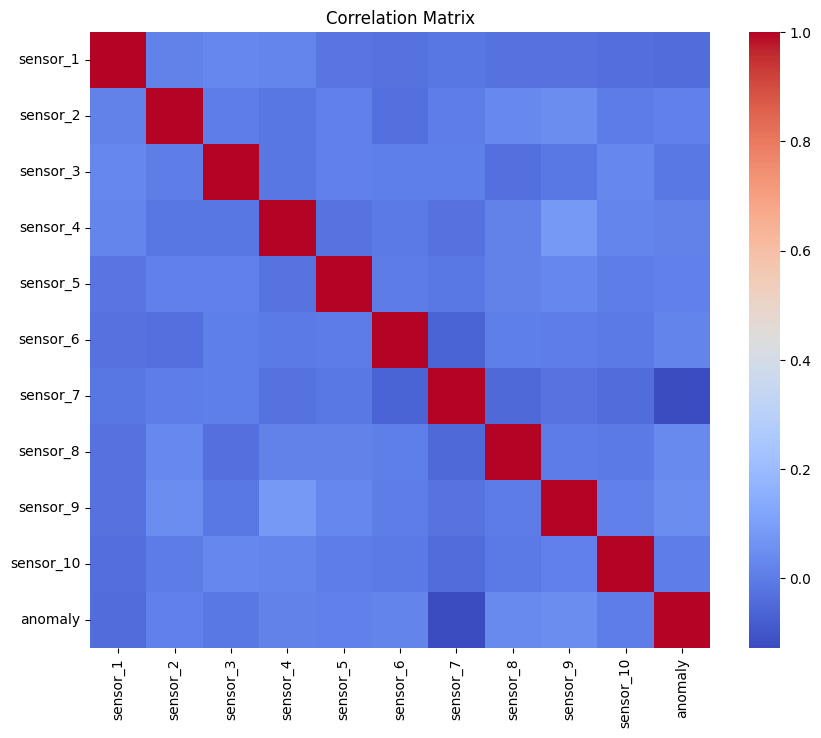

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
X = df.drop('anomaly', axis=1)
y = df['anomaly']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name}\nF1 Score: {f1:.4f}\nAccuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-"*50)

In [16]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

Logistic Regression
F1 Score: 0.9183
Accuracy: 0.9450
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       189
         1.0       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



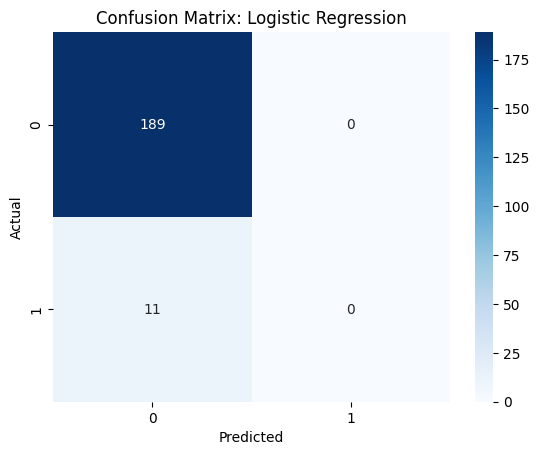

--------------------------------------------------
SVM
F1 Score: 0.9183
Accuracy: 0.9450
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       189
         1.0       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



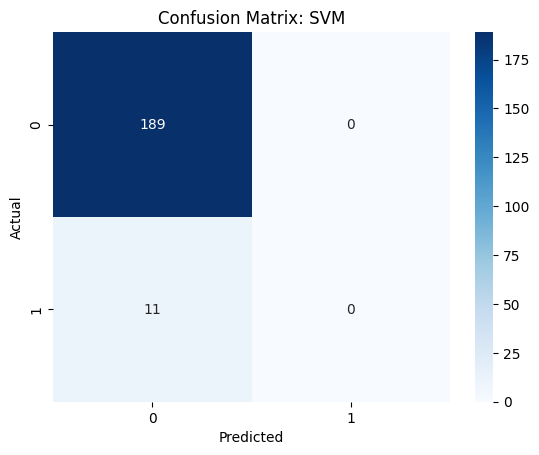

--------------------------------------------------
KNN
F1 Score: 0.9183
Accuracy: 0.9450
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       189
         1.0       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



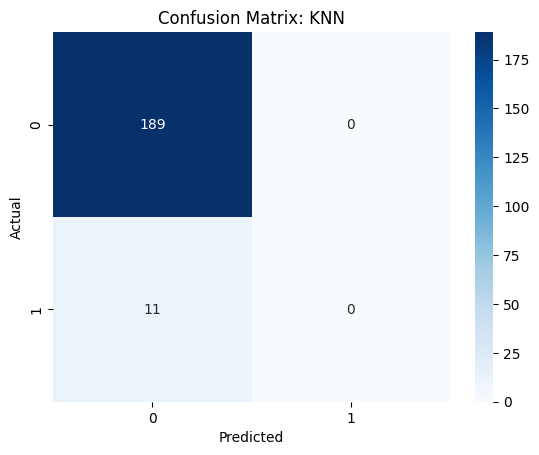

--------------------------------------------------
Decision Tree
F1 Score: 0.8847
Accuracy: 0.8800
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       189
         1.0       0.00      0.00      0.00        11

    accuracy                           0.88       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.89      0.88      0.88       200



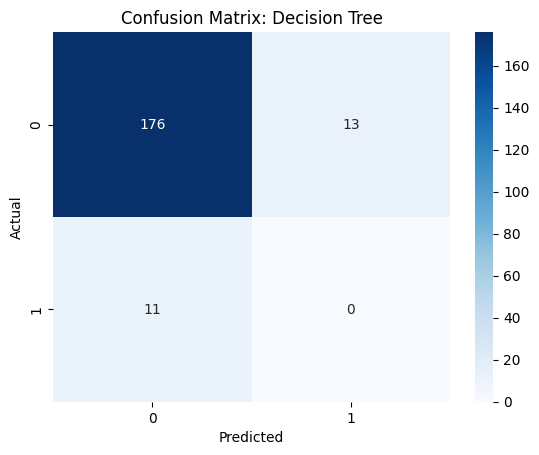

--------------------------------------------------
Random Forest
F1 Score: 0.9183
Accuracy: 0.9450
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       189
         1.0       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



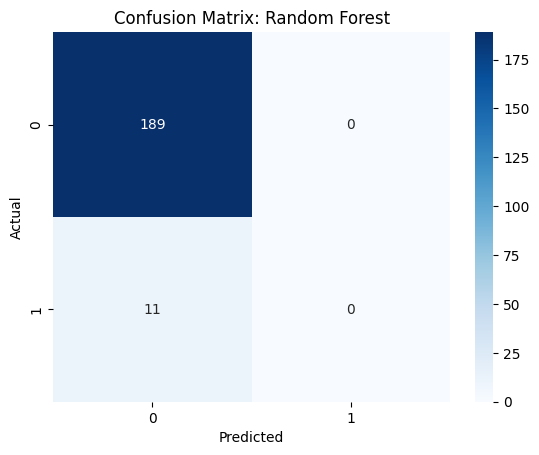

--------------------------------------------------


In [17]:
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(model, name)

XGBoost
F1 Score: 0.9183
Accuracy: 0.9450
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       189
         1.0       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



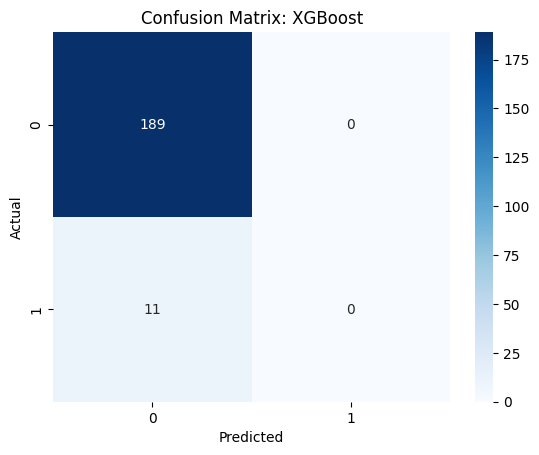

--------------------------------------------------


In [18]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
evaluate_model(xgb, "XGBoost")

Tuned Random Forest
F1 Score: 0.9183
Accuracy: 0.9450
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       189
         1.0       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



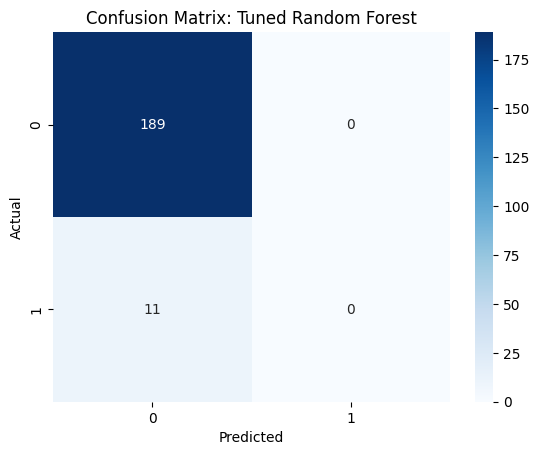

--------------------------------------------------


In [20]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
evaluate_model(grid_search.best_estimator_, "Tuned Random Forest")
